11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9038 - loss: 0.3154 - val_accuracy: 0.9834 - val_loss: 0.0514
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9939 - loss: 0.0205 - val_accuracy: 0.9902 - val_loss: 0.0333
313/313 - 2s - 6ms/step - accuracy: 0.9902 - loss: 0.0333

Precisão do teste: 0.9901999831199646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Previsão para a primeira imagem de teste: 7
Rótulo real da primeira imagem de teste: 7


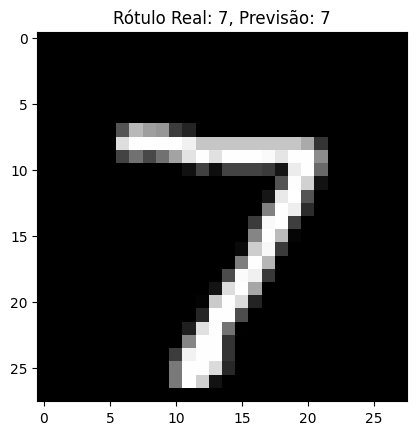

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar e Pré-processar os Dados
# O dataset MNIST já vem dividido em treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 2. Normalizar os valores dos pixels para o intervalo de 0 a 1
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# 3. Construir o Modelo (Rede Neural Convolucional - CNN)
model = models.Sequential()
# Primeira camada convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Segunda camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Terceira camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adicionar camadas densas ( fully connected) para classificação
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Camada de saída com 10 classes (dígitos de 0 a 9)

# 4. Compilar o Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Treinar o Modelo
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 6. Avaliar o Modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisão do teste: {test_acc}')

# 7. Exemplo de Previsão
# Prever a classe de uma imagem específica (e.g., a primeira imagem de teste)
predictions = model.predict(test_images[:1])
print(f'Previsão para a primeira imagem de teste: {predictions.argmax()}')
print(f'Rótulo real da primeira imagem de teste: {test_labels[0]}')

# 8. Visualizar a primeira imagem de teste
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Rótulo Real: {test_labels[0]}, Previsão: {predictions.argmax()}')
plt.show()

# 9. Visualizar o total de imagens de teste e selecionar aleatoriamente algunas das imagens de teste
import numpy as np
print(len(test_images))

# Escolhe, por exemplo, 5 imagens aleatórias do conjunto de teste
indices = np.random.choice(len(test_images), 5)
for i in indices:
    img = test_images[i]
    label = test_labels[i]
    pred = model.predict(img.reshape(1, 28, 28, 1))
    pred_label = np.argmax(pred)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Rótulo real: {label} | Predição: {pred_label} | i: {i}")
    plt.axis('off')
    plt.show()

#Reconhecimento de Caracteres

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### 1. Carregar e Pré-processar os Dados

In [ ]:
# O dataset MNIST já vem dividido em treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 2. Normalização

In [ ]:
# Normalizar os valores dos pixels para o intervalo de 0 a 1
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

### 3. Construir o Modelo de Rede Neural Convolucional (CNN)

In [ ]:
# 3. Construir o Modelo (Rede Neural Convolucional - CNN)
model = models.Sequential()
# Primeira camada convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Segunda camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Terceira camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

# Adicionar camadas densas ( fully connected) para classificação
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Camada de saída com 10 classes (dígitos de 0 a 9)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Compilar o Modelo

In [ ]:
# 4. Compilar o Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 5. Treinamento do Modelo

In [ ]:
# 5. Treinar o Modelo
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8942 - loss: 0.3406 - val_accuracy: 0.9828 - val_loss: 0.0537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9846 - loss: 0.0471 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9879 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9920 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9925 - val_loss: 0.0256


### 6. Avaliação do Modelo

In [ ]:
# 6. Avaliar o Modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisão do teste: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9925 - loss: 0.0256

Precisão do teste: 0.9925000071525574


### 7. Predição

In [ ]:
# 7. Exemplo de Previsão
# Prever a classe de uma imagem específica (e.g., a primeira imagem de teste)
predictions = model.predict(test_images[:1])
print(f'Previsão para a primeira imagem de teste: {predictions.argmax()}')
print(f'Rótulo real da primeira imagem de teste: {test_labels[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Previsão para a primeira imagem de teste: 7
Rótulo real da primeira imagem de teste: 7


### 8. Visualizar a imagem de teste

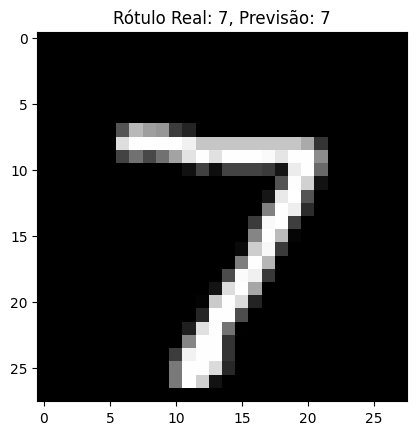

In [ ]:
# 8. Visualizar a primeira imagem de teste
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Rótulo Real: {test_labels[0]}, Previsão: {predictions.argmax()}')
plt.show()


### 9. Visualizar aleatóriamente algumas das imagens de teste

10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


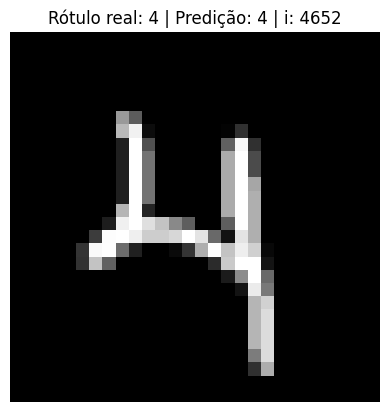

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


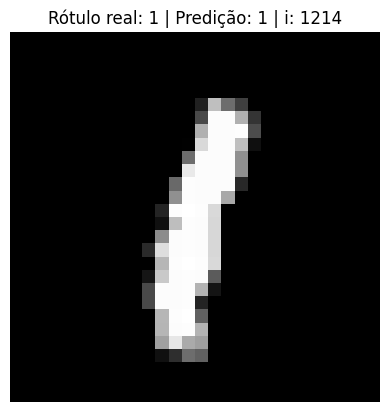

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


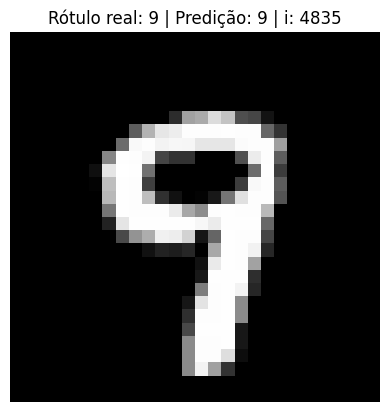

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


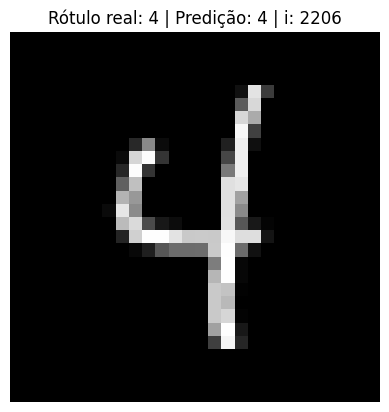

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


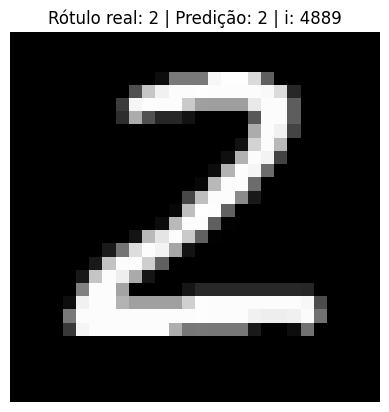

In [ ]:
# 9. Visualizar o total de imagens de teste e selecionar aleatoriamente algunas das imagens de teste

import numpy as np

print(len(test_images))

# Escolhe, por exemplo, 5 imagens aleatórias do conjunto de teste
indices = np.random.choice(len(test_images), 5)

for i in indices:
    img = test_images[i]
    label = test_labels[i]
    pred = model.predict(img.reshape(1, 28, 28, 1))
    pred_label = np.argmax(pred)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Rótulo real: {label} | Predição: {pred_label} | i: {i}")
    plt.axis('off')
    plt.show()